# Практическая работа 1 (X.8.12)

## 0. Условие задачи X.8.12

Решить систему дифференциальных уравнений
\begin{equation*}
 \begin{cases}
   u' = 998u + 1998v &\text{(1)},\\
   v' = -999u - 1999v &\text{(2)}
 \end{cases}
\end{equation*}
с начальными условиями $u(0) = v(0) = 1$ на отрезке интегрирования [0, 10] двумя методами второго порядка аппроксимации:

а) методом трапеций,

б) схемой CROS.

Проделать вычисления при следующих шагах интегрирования:
$h = 10^{-4}, 10^{-3}, 2.5\cdot10^{-3}, 5\cdot10^{-3}, 10^{-2}.$
Решения сравнить между собой и с точным решением. Объяснить поведение метода трапеций при увеличении шага интегрирования.

Сравнить графики решений при разных шагах интегрирования.

## 1. Поиск точного решения

Имеем задачу Коши для линейной однородной системы дифференциальных уравнений. Решим систему методом исключения. Из (2) имеем (3):

\begin{equation*}
 u = - \frac{v' + 1999v}{999}.
\end{equation*}

Продифференцируем:

\begin{equation*}
 u' = - \frac{1}{999} v" - \frac{1999}{999} v'.
\end{equation*}

Подставляем $u'$ и $u$ в уравнение (1):

\begin{equation*}
 - \frac{1}{999} v" - \frac{1999}{999} v' = - \frac{998}{999} v' - \frac{998\cdot 1999}{999} v + 1998v;\\
 - v" - 1999 v' = -998 v' + 1000 v;\\
 v" + 1001 v' + 1000 v = 0.
\end{equation*}

После замены $v = e^{\lambda t}$ получаем характеристическое уравнение:

\begin{equation*}
 \lambda ^{2} + 1001 \lambda + 1000 = 0;\\
 D = 1002001 - 4000 = 999^{2};\\
 \lambda _{1, 2} = \frac{-1001 \pm 999}{2} = -1, -2000.
\end{equation*}

Получили общее решение для $v(t)$:

\begin{equation*}
 v(t) = C_1 e^{-t} + C_2 e^{-2000t};\\
 v'(t) = -C_1 e^{-t} - 2000 C_2 e^{-2000t}.
\end{equation*}

Подставим в (3) и после преобразований получим:

\begin{equation*}
 u = -2 C_1 e^{-t} + \frac{C_2}{999} e^{-2000t}.
\end{equation*}

Теперь решаем задачу Коши. Найдем частное решение, соответствующее начальным условиям $u(0) = v(0) = 1$:

\begin{equation*}
 \begin{cases}
   u(0) = -2 C_1 + \frac{C_2}{999} = 1,\\
   v(0) = C_1 + C_2 = 1.
 \end{cases}
\end{equation*}

После решения системы имеем $C_1 = \frac{-998}{1999}, C_2 = \frac{2997}{3}$. Нашли точное решение задачи Коши для линейной однородной системы дифференциальных уравнений:

\begin{equation*}
 \begin{cases}
   u(t) = \frac{1996}{1999} e^{-t} + \frac{3}{1999} e^{-2000t},\\
   v(t) = -\frac{998}{1999} e^{-t} + \frac{2997}{3} e^{-2000t}.
 \end{cases}
\end{equation*}

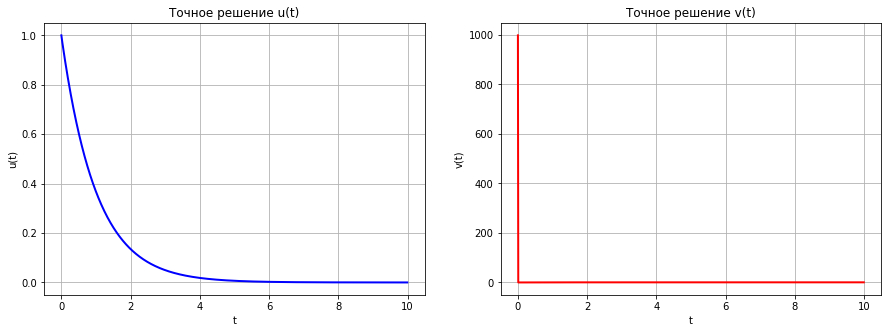

In [86]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5 #height
plt.rcParams["figure.figsize"] = fig_size

# constants
x_min = 0
x_max = 10

x = np.arange(x_min, x_max, 0.01)
u = 1996/1999 * np.exp(-x) + 3/1999 * np.exp(-2000*x)
v = -998/1999 * np.exp(-x) + 2997/3 * np.exp(-2000*x)

ax = plt.subplot(1,2,1)
plt.plot(x, u, color='blue', linewidth=2.0)
ax.set_title("Точное решение u(t)")
ax.set_xlabel('t')
ax.set_ylabel('u(t)')
plt.grid()

ax = plt.subplot(1,2,2)
plt.plot(x, v, color='red', linewidth=2.0)
ax.set_title("Точное решение v(t)")
ax.set_xlabel('t')
ax.set_ylabel('v(t)')
plt.grid()

## 2. Решение методом трапеций

Общий вид метода трапеций:

\begin{equation*}
 y_{k+1} = y_k + h \cdot \frac{f(x_k, y_k) + f(x_{k+1}, y_{k+1})}{2}.
\end{equation*}

Исходную систему можно преобразовать к виду:

\begin{equation*}
 \begin{cases}
   \frac{u_{n+1} - u_n}{h} = \frac{998u_n + 1998v_n + 998u_{n+1} + 1998v_{n+1}}{2},\\
   \frac{v_{n+1} - v_n}{h} = \frac{-999u_n - 1999v_n - 999u_{n+1} - 1999v_{n+1}}{2}.
 \end{cases}
\end{equation*}

Имеем линейную систему:

\begin{equation*}
 A \cdot X = B
\end{equation*}

\begin{equation*}
 \begin{pmatrix}
  1-499h & -999h\\
  499.5h & 1+999.5h
 \end{pmatrix} \cdot \begin{pmatrix}
  u_{n+1}\\
  v_{n+1}
 \end{pmatrix} = \begin{pmatrix}
  (1+499h) u_n + 999h \cdot v_n\\
  -499.5h \cdot u_n + (1-999.5h) v_n
 \end{pmatrix}
\end{equation*}

Решая данную систему получим выражения вида: $u_{n+1} = f(u_n, v_n), v_{n+1} = g(u_n, v_n)$.
Далее подставим начальные условия: $u(0) = u_0 = 1, v(0) = v_0 = 1$.
Получаем искомые формулы решения системы.

Text(0.5, 0, 'v(t)')

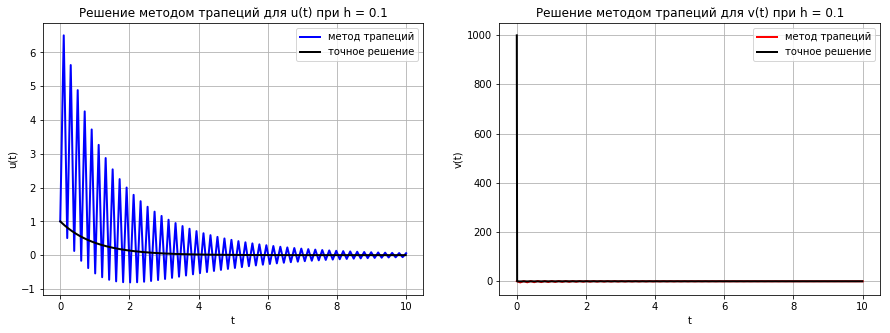

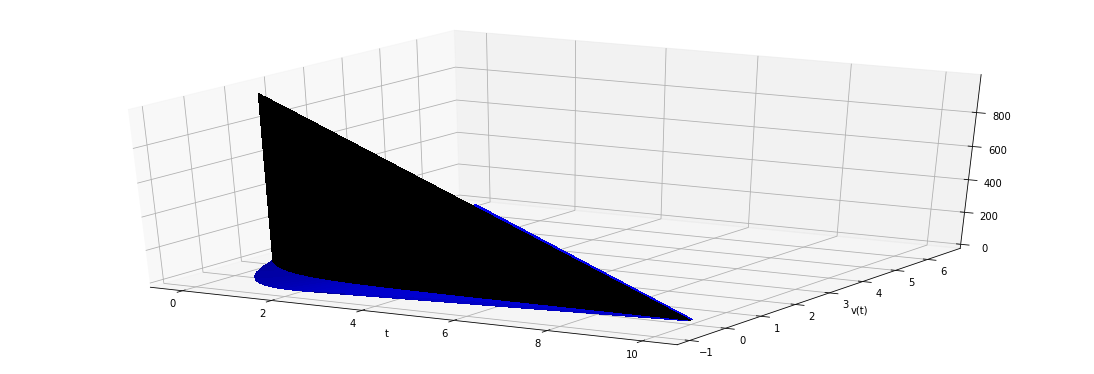

In [97]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5 #height
plt.rcParams["figure.figsize"] = fig_size

# constants
x_min = 0
x_max = 10

h = 10**-1
N = int((x_max - x_min) / h)

u = np.zeros(N)
v = np.zeros(N)

u[0] = 1
v[0] = 1

for i in range(0, N-1):
    A = np.array([[1 - 499*h, -999*h], [499.5*h, 1 + 999.5*h]])
    B = np.array([(1 + 499*h)*u[i] + 999*h*v[i], -499.5*h*u[i] + (1 - 999.5*h)*v[i]])
    X = np.linalg.solve(A, B) # решаем данную систему
    
    u[i+1] = X[0]
    v[i+1] = X[1]

x = np.linspace(x_min, x_max, num=N)

ax = plt.subplot(1,2,1)
plt.plot(x, u, color='blue', label='метод трапеций', linewidth=2.0)
ax.set_title(f"Решение методом трапеций для u(t) при h = {h}")
ax.set_xlabel('t')
ax.set_ylabel('u(t)')
ax.legend()

ax = plt.subplot(1,2,2)
plt.plot(x, v, color='red', label='метод трапеций', linewidth=2.0)
ax.set_title(f"Решение методом трапеций для v(t) при h = {h}")
ax.set_xlabel('t')
ax.set_ylabel('v(t)')
ax.legend()

# Точное решение
x0 = np.arange(x_min, x_max, 0.01)
u0 = 1996/1999 * np.exp(-x0) + 3/1999 * np.exp(-2000*x0)
v0 = -998/1999 * np.exp(-x0) + 2997/3 * np.exp(-2000*x0)

ax = plt.subplot(1,2,1)
plt.plot(x0, u0, color='black', label='точное решение', linewidth=2.0)
ax.legend()
plt.grid()

ax = plt.subplot(1,2,2)
plt.plot(x0, v0, color='black', label='точное решение', linewidth=2.0)
ax.legend()
plt.grid()

# Возможно более наглядное изображение решения
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.plot_trisurf(x, u, v, color='blue', label='метод трапеций', linewidth=0.0, antialiased=False)
ax.plot_trisurf(x0, u0, v0, color='black', label='точное решение', linewidth=0.0, antialiased=False)
ax.set_xlabel('t')
ax.set_ylabel('u(t)')
ax.set_ylabel('v(t)')

### Графики решений при других h

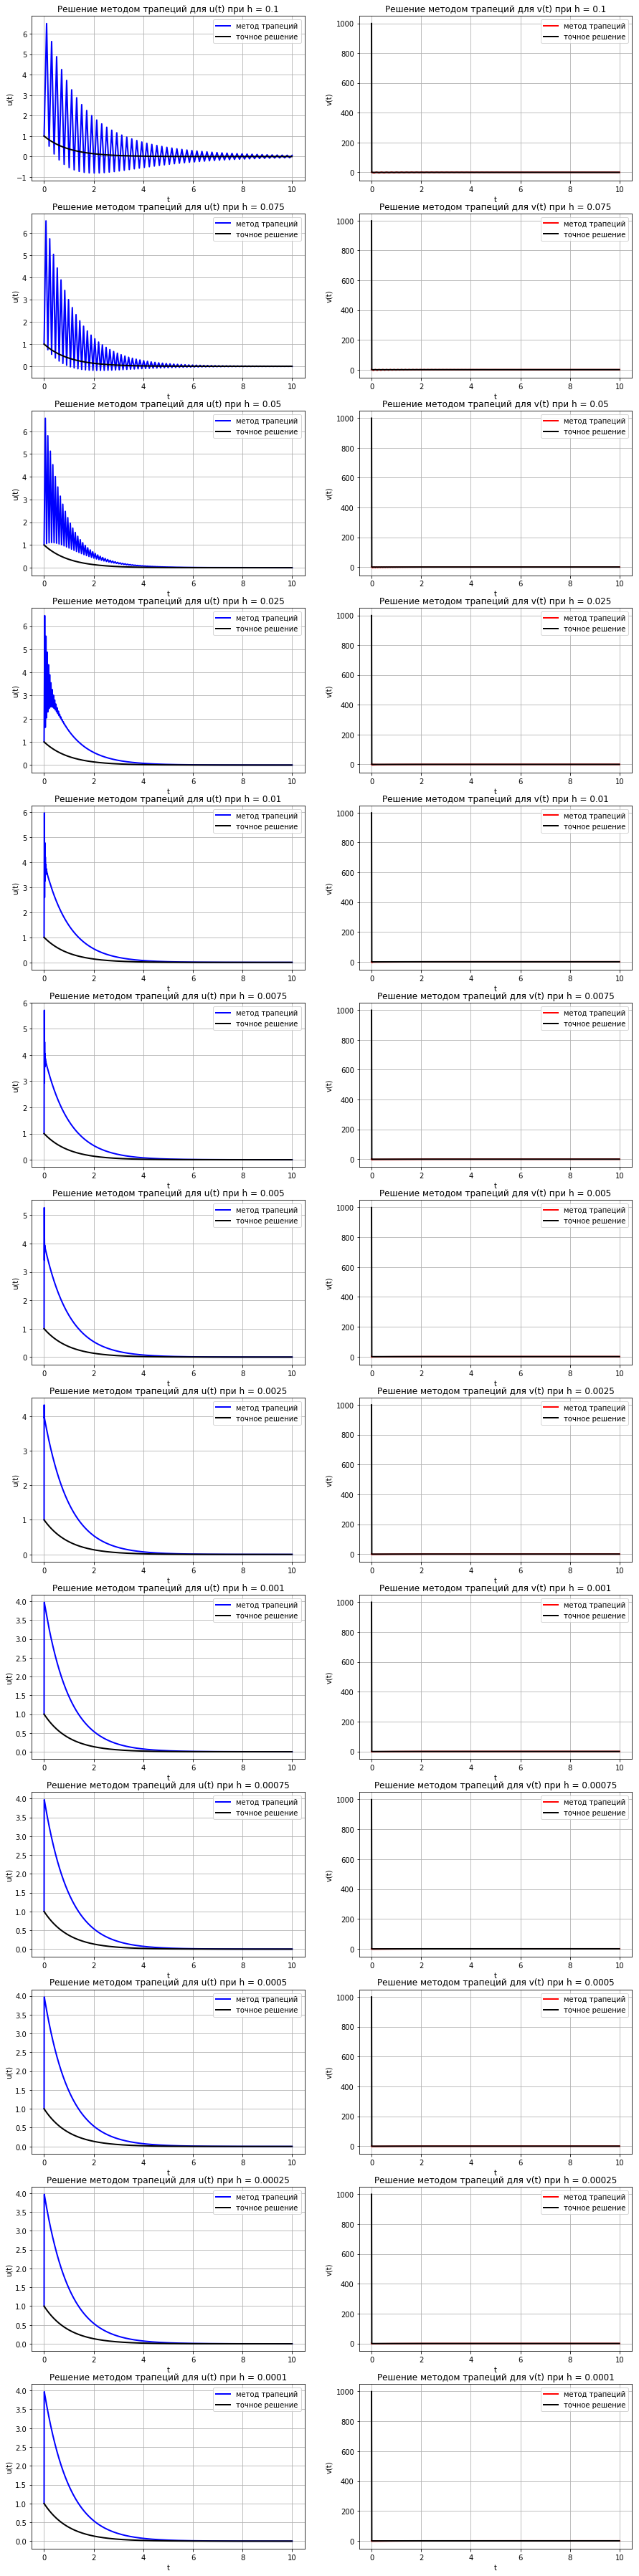

In [105]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

import mpl_toolkits.mplot3d.axes3d as p3

# Различные значения h
hs = [10**-1, 7.5*10**-2, 5*10**-2, 2.5*10**-2,
      10**-2, 7.5*10**-3, 5*10**-3, 2.5*10**-3,
      10**-3, 7.5*10**-4, 5*10**-4, 2.5*10**-4, 10**-4]

lenhs = len(hs)

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*len(hs) #height
plt.rcParams["figure.figsize"] = fig_size

# constants
x_min = 0
x_max = 10

cycles = 1
for h in hs:
    
    N = int((x_max - x_min) / h)

    u = np.zeros(N)
    v = np.zeros(N)

    u[0] = 1
    v[0] = 1

    for i in range(0, N-1):
        A = np.array([[1 - 499*h, -999*h], [499.5*h, 1 + 999.5*h]])
        B = np.array([(1 + 499*h)*u[i] + 999*h*v[i], -499.5*h*u[i] + (1 - 999.5*h)*v[i]])
        X = np.linalg.solve(A, B) # решаем данную систему
    
        u[i+1] = X[0]
        v[i+1] = X[1]

    x = np.linspace(x_min, x_max, num=N)

    ax = plt.subplot(lenhs,2,cycles)
    plt.plot(x, u, color='blue', label='метод трапеций', linewidth=2.0)
    ax.set_title(f"Решение методом трапеций для u(t) при h = {h}")
    ax.set_xlabel('t')
    ax.set_ylabel('u(t)')
    ax.legend()

    ax = plt.subplot(lenhs,2,cycles+1)
    plt.plot(x, v, color='red', label='метод трапеций', linewidth=2.0)
    ax.set_title(f"Решение методом трапеций для v(t) при h = {h}")
    ax.set_xlabel('t')
    ax.set_ylabel('v(t)')
    ax.legend()

    # Точное решение
    x0 = np.arange(x_min, x_max, 0.01)
    u0 = 1996/1999 * np.exp(-x0) + 3/1999 * np.exp(-2000*x0)
    v0 = -998/1999 * np.exp(-x0) + 2997/3 * np.exp(-2000*x0)

    ax = plt.subplot(lenhs,2,cycles)
    plt.plot(x0, u0, color='black', label='точное решение', linewidth=2.0)
    ax.legend()
    plt.grid()

    ax = plt.subplot(lenhs,2,cycles+1)
    plt.plot(x0, v0, color='black', label='точное решение', linewidth=2.0)
    ax.legend()
    plt.grid()
    
    cycles += 2

### Анализ полученных результатов

Согласно теории, при уменьшении шага сетки h, найденное решение должно приближаться к точному. Также происходит исчезновение биений, наблюдаемое при больших h. Более того точное решение для v(t) имеет большой коэффициент при при $e^{-2000t}$. Если убрать его, то получим следующие результаты.

Text(0.5, 0, 'v(t)')

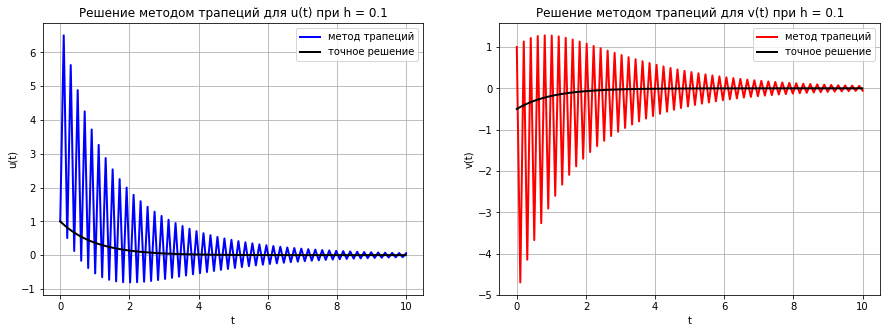

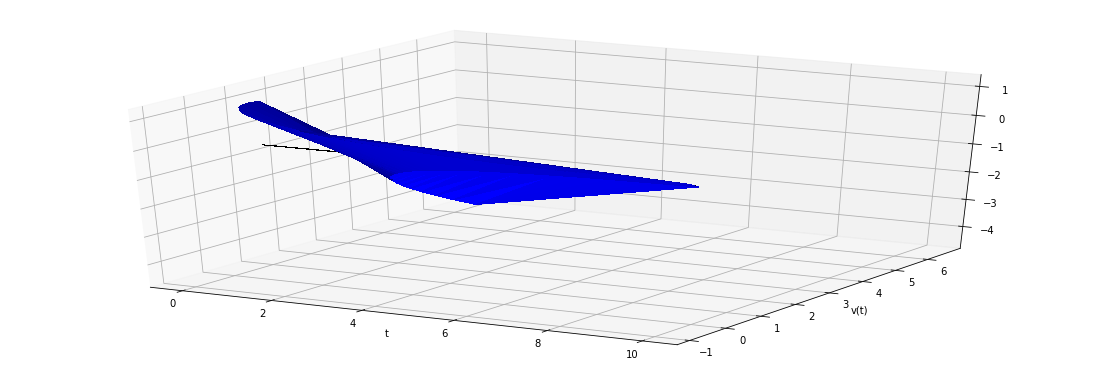

In [102]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5 #height
plt.rcParams["figure.figsize"] = fig_size

# constants
x_min = 0
x_max = 10

h = 10**-1
N = int((x_max - x_min) / h)

u = np.zeros(N)
v = np.zeros(N)

u[0] = 1
v[0] = 1

for i in range(0, N-1):
    A = np.array([[1 - 499*h, -999*h], [499.5*h, 1 + 999.5*h]])
    B = np.array([(1 + 499*h)*u[i] + 999*h*v[i], -499.5*h*u[i] + (1 - 999.5*h)*v[i]])
    X = np.linalg.solve(A, B) # решаем данную систему
    
    u[i+1] = X[0]
    v[i+1] = X[1]

x = np.linspace(x_min, x_max, num=N)

ax = plt.subplot(1,2,1)
plt.plot(x, u, color='blue', label='метод трапеций', linewidth=2.0)
ax.set_title(f"Решение методом трапеций для u(t) при h = {h}")
ax.set_xlabel('t')
ax.set_ylabel('u(t)')
ax.legend()

ax = plt.subplot(1,2,2)
plt.plot(x, v, color='red', label='метод трапеций', linewidth=2.0)
ax.set_title(f"Решение методом трапеций для v(t) при h = {h}")
ax.set_xlabel('t')
ax.set_ylabel('v(t)')
ax.legend()

# Точное решение
x0 = np.arange(x_min, x_max, 0.01)
u0 = 1996/1999 * np.exp(-x0) + 3/1999 * np.exp(-2000*x0)
v0 = -998/1999 * np.exp(-x0) 

ax = plt.subplot(1,2,1)
plt.plot(x0, u0, color='black', label='точное решение', linewidth=2.0)
ax.legend()
plt.grid()

ax = plt.subplot(1,2,2)
plt.plot(x0, v0, color='black', label='точное решение', linewidth=2.0)
ax.legend()
plt.grid()

# Возможно более наглядное изображение решения
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.plot_trisurf(x, u, v, color='blue', label='метод трапеций', linewidth=0.0, antialiased=False)
ax.plot_trisurf(x0, u0, v0, color='black', label='точное решение', linewidth=0.0, antialiased=False)
ax.set_xlabel('t')
ax.set_ylabel('u(t)')
ax.set_ylabel('v(t)')

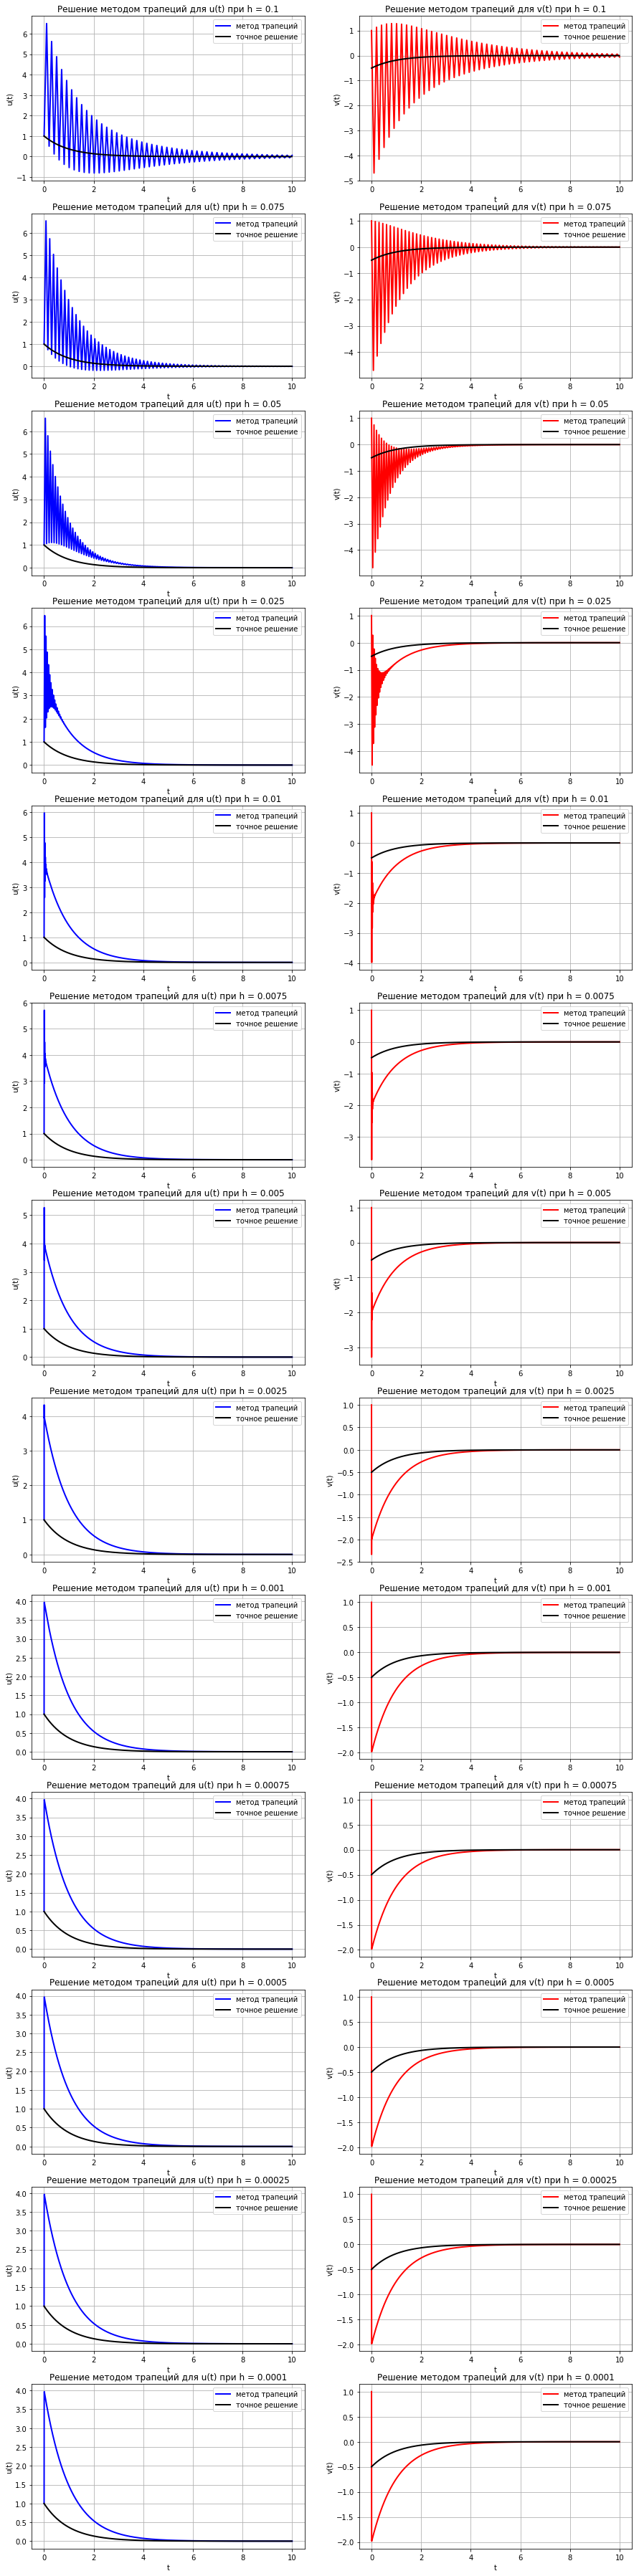

In [104]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

import mpl_toolkits.mplot3d.axes3d as p3

# Различные значения h
hs = [10**-1, 7.5*10**-2, 5*10**-2, 2.5*10**-2,
      10**-2, 7.5*10**-3, 5*10**-3, 2.5*10**-3,
      10**-3, 7.5*10**-4, 5*10**-4, 2.5*10**-4, 10**-4]

lenhs = len(hs)

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*len(hs) #height
plt.rcParams["figure.figsize"] = fig_size

# constants
x_min = 0
x_max = 10

cycles = 1
for h in hs:
    
    N = int((x_max - x_min) / h)

    u = np.zeros(N)
    v = np.zeros(N)

    u[0] = 1
    v[0] = 1

    for i in range(0, N-1):
        A = np.array([[1 - 499*h, -999*h], [499.5*h, 1 + 999.5*h]])
        B = np.array([(1 + 499*h)*u[i] + 999*h*v[i], -499.5*h*u[i] + (1 - 999.5*h)*v[i]])
        X = np.linalg.solve(A, B) # решаем данную систему
    
        u[i+1] = X[0]
        v[i+1] = X[1]

    x = np.linspace(x_min, x_max, num=N)

    ax = plt.subplot(lenhs,2,cycles)
    plt.plot(x, u, color='blue', label='метод трапеций', linewidth=2.0)
    ax.set_title(f"Решение методом трапеций для u(t) при h = {h}")
    ax.set_xlabel('t')
    ax.set_ylabel('u(t)')
    ax.legend()

    ax = plt.subplot(lenhs,2,cycles+1)
    plt.plot(x, v, color='red', label='метод трапеций', linewidth=2.0)
    ax.set_title(f"Решение методом трапеций для v(t) при h = {h}")
    ax.set_xlabel('t')
    ax.set_ylabel('v(t)')
    ax.legend()

    # Точное решение
    x0 = np.arange(x_min, x_max, 0.01)
    u0 = 1996/1999 * np.exp(-x0) + 3/1999 * np.exp(-2000*x0)
    v0 = -998/1999 * np.exp(-x0)

    ax = plt.subplot(lenhs,2,cycles)
    plt.plot(x0, u0, color='black', label='точное решение', linewidth=2.0)
    ax.legend()
    plt.grid()

    ax = plt.subplot(lenhs,2,cycles+1)
    plt.plot(x0, v0, color='black', label='точное решение', linewidth=2.0)
    ax.legend()
    plt.grid()
    
    cycles += 2

## 2. Решение схемой CROS